Monte Carlo: sampling from a probability distribution to predict outcomes

In [1]:
import random # we don't actually use this.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# model random walks with this sort of distribution?
# random.lognormvariate(mu, sigma) 
mu = .12
sigma = .15
# [random.lognormvariate(mu, sigma) for _ in range(100)]
growth_per_year = np.random.lognormal(mu, sigma, size=20)
growth_per_year

array([ 0.95877792,  1.25011255,  1.12159051,  1.27636865,  1.09259972,
        1.02748749,  0.98303398,  1.2589569 ,  0.91451876,  0.85823626,
        0.96288065,  1.34071291,  1.38983081,  1.36277772,  1.24127004,
        0.89579638,  1.10169517,  1.39820567,  1.45747328,  1.09090868])

In [3]:
# this will be the factor of the growth from the beginning
cumulative_returns = np.cumprod(growth_per_year)
cumulative_returns

array([  0.95877792,   1.19858031,   1.3443163 ,   1.71584319,
         1.87472979,   1.9262614 ,   1.89358041,   2.38393611,
         2.18015431,   1.87108749,   1.80163394,   2.41547389,
         3.35710002,   4.57498112,   5.678787  ,   5.08703686,
         5.60436394,   7.83605342,  11.42083848,  12.4590918 ])

In [4]:
100_000 * cumulative_returns # For example, an account with $100,000

array([   95877.79197382,   119858.03147716,   134431.63049751,
         171584.31877587,   187472.97892884,   192626.13992034,
         189358.04068652,   238393.6113308 ,   218015.43071064,
         187108.74893634,   180163.39398667,   241547.38887165,
         335710.00214904,   457498.11172742,   567878.70015105,
         508703.6858135 ,   560436.39421154,   783605.34245857,
        1142083.848069  ,  1245909.17980061])

So let's model an account growth over 20 years, assuming an average growth of 12%, a standard deviation of 15%, tweaking the number of different runs, arbitrarily high (10,000 would be really slow for the graphics).

0.06101799011230469 seconds to calc
225.45224452018738 seconds to plot


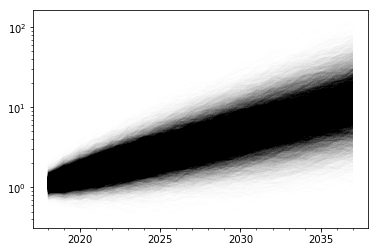

In [5]:
import time
starting_account_value = 100_000
number_of_runs = 15_000
start = time.time()
df = pd.DataFrame(
    np.cumprod(
        np.random.lognormal(.12, .15, size=(20, number_of_runs)),
        axis=0), # * starting_account_value,
    index=pd.date_range('2018', periods=20, freq='A')
)
calc_time = time.time()
print(f'{calc_time - start} seconds to calc')
darkness_constant = 30.0
alpha = darkness_constant/number_of_runs
ax = df.plot(legend=False, color='black', alpha=alpha)
plt.yscale('log')
print(f'{time.time()-calc_time} seconds to plot')
#plt.show()

We now need to use the end results to estimate the distribution of the final results.

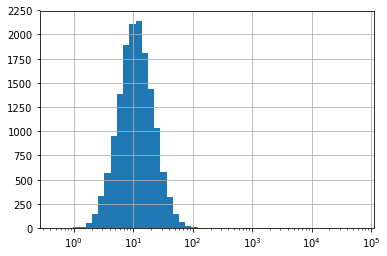

In [6]:
end_results = df.iloc[-1]
#end_results.hist(bins=100, density=True)

end_results.hist(
    bins=np.logspace(
        np.log(end_results.min()), 
        np.log(end_results.max()), 
        50)
)

#end_results.plot.density()
plt.xscale('log')

In [7]:
end_results.describe(percentiles=[.05, .25, .5, .75, .95])

count    15000.000000
mean        13.750144
std         10.184873
min          0.727162
5%           3.647548
25%          7.052547
50%         11.009184
75%         17.286868
95%         32.991169
max        121.586833
Name: 2037-12-31 00:00:00, dtype: float64

TODO: Maximum drawdown: from a top (local maximum) to a bottom (local minimum) over time

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,14990,14991,14992,14993,14994,14995,14996,14997,14998,14999
2018-12-31,1.056864,1.049918,1.515606,1.086699,1.339346,1.134315,1.052636,1.172136,0.933533,1.060166,...,1.214147,1.165770,1.080150,1.079367,1.273780,1.334251,1.222967,0.957316,0.850625,1.341084
2019-12-31,0.877085,1.211222,1.325164,1.115758,1.148941,1.285011,1.261096,1.299004,1.397844,1.509036,...,1.355332,1.586764,1.486301,1.238362,1.599301,1.486331,2.560898,1.098115,0.934874,1.419578
2020-12-31,0.703256,1.337106,1.527538,1.007718,1.109667,1.294377,1.549509,1.476244,1.454980,1.872447,...,1.412866,1.588662,1.702004,1.768587,1.282732,1.359175,2.727753,1.280665,0.896321,1.561227
2021-12-31,0.617286,1.429117,1.651610,1.154782,1.278831,1.221062,1.617878,1.826644,1.653803,2.379608,...,1.337195,1.492969,2.479744,2.141924,1.587681,1.741012,3.003721,1.948046,0.890694,1.751365
2022-12-31,0.547746,1.384519,2.233776,1.021376,1.234779,1.222443,2.165719,2.362777,1.599019,2.086326,...,1.129207,1.109829,2.258795,1.740374,1.994118,1.951039,3.449910,2.759220,0.847791,2.132188
2023-12-31,0.576501,1.191530,2.419478,0.955318,1.456507,1.318796,2.576888,2.617289,1.772669,2.424394,...,1.531808,1.057163,2.453798,1.905235,2.431205,2.271787,3.841320,2.937275,0.838065,2.552553
2024-12-31,0.685919,1.056973,3.298744,0.941227,1.821496,1.204675,3.233167,3.982862,1.619097,3.520325,...,2.035975,1.096223,3.014636,1.877105,2.854216,3.393116,3.660593,2.710245,0.828032,4.065748
2025-12-31,0.644886,1.275407,3.978528,0.959342,1.608077,1.019580,4.557300,6.037122,2.072979,3.427301,...,2.596170,1.498724,3.077512,1.572412,2.846736,3.071755,3.684769,2.427318,0.789752,5.199162
2026-12-31,0.820331,1.773032,4.245889,0.857736,1.783004,1.203859,4.760641,5.879605,2.001512,4.309618,...,3.096367,1.615819,2.748218,2.135888,3.624496,3.074960,3.453613,2.712864,0.703230,5.190204
2027-12-31,0.789353,1.817013,5.217748,1.154692,2.028598,1.475497,4.648452,7.739240,2.419107,4.707583,...,4.057901,1.284592,3.248549,2.492217,4.347374,3.713656,3.877259,3.087931,0.826138,4.485771


In [9]:
end_results

0         4.018897
1         4.291009
2        25.489356
3         2.225884
4         5.900603
5         7.035597
6         6.654041
7        25.260552
8         7.308143
9         8.251520
10       25.356289
11       10.495769
12       32.834352
13        8.801367
14        9.648448
15        3.146677
16        7.747205
17        8.959054
18       12.524000
19       24.836762
20       13.838920
21        7.736623
22       13.865209
23       29.232266
24       12.213710
25        7.697884
26       13.689614
27       10.442382
28       13.674398
29       12.641710
           ...    
14970    10.100700
14971     4.222207
14972    12.768113
14973    35.653754
14974    10.799826
14975    14.661635
14976    10.799623
14977     3.503807
14978    11.559410
14979     6.700713
14980     5.338207
14981    18.007475
14982    10.969891
14983    25.579297
14984    22.265008
14985    10.904347
14986     7.216937
14987    10.274970
14988    17.338387
14989     9.331972
14990     8.451679
14991     3.

In [10]:
type(df), type(end_results)

(pandas.core.frame.DataFrame, pandas.core.series.Series)